## 2-D Visibility Filtering with Horizontal X-Sweep (a variation for Task-B):
Name: Divya Natekar

NYU ID: N19974330

Net ID: dyn2009
### Logic:
In this program, instead of sweeping vertically along Y (like in the previous simulation), here we simulate a horizontal sweep along the X-axis. In other words, we imagine the scanner fixed in space, moving along X and recording the leftmost (or closest) points it can see. It is important for understanding how line-of-sight filtering works under varying scanner geometries.

#### i. Importing the required libraries:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### ii. Loading and preparing the dataset:

In [2]:
# Load data from Google Sheet and prepare the DataFrame
sheet_url = "https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/edit?gid=836186177"
csv_url = sheet_url.replace("/edit?gid=", "/export?format=csv&gid=")
df = pd.read_csv(csv_url)
df = df[['x', 'y']].dropna().astype(float)
df = df.sort_values(by=['x', 'y']).reset_index(drop=True)


#### iii. Cleaning the dataset:

In [3]:
# Remove the point (x=0, y=10) and rows with y=0
df = df[~((df['x'] == 0) & (df['y'] == 10))]
df = df[df['y'] != 0]


#### iv. Computing Y max:

In [4]:
# Calculate Ymax from x ≈ 0
near_zero_x = df[np.abs(df['x']) < 1e-6]
Ymax = near_zero_x['y'].max() if not near_zero_x.empty else df.loc[np.abs(df['x']).idxmin(), 'y']
print("Ymax =", Ymax)


Ymax = 9.0


#### v. Defining the masks for the data:

In [5]:
# Define masks for excluded and remaining data
mask_y_lt_0 = df['y'] < 0
mask_y_gt_Ymax = df['y'] > Ymax
mask_remaining = (df['y'] > 0) & (df['y'] <= Ymax)


#### vi. Separating and saving the filtered datasets:

In [6]:
# Split and save datasets into excluded and remaining sets
excluded_combined = df[mask_y_lt_0 | mask_y_gt_Ymax]
remaining_clean = df[mask_remaining]

excluded_combined.to_csv("excluded_combined_y_lt0_or_y_gt_Ymax.csv", index=False)
remaining_clean.to_csv("remaining_clean_y_between_0_Ymax.csv", index=False)


#### vii. Plotting the excluded points:

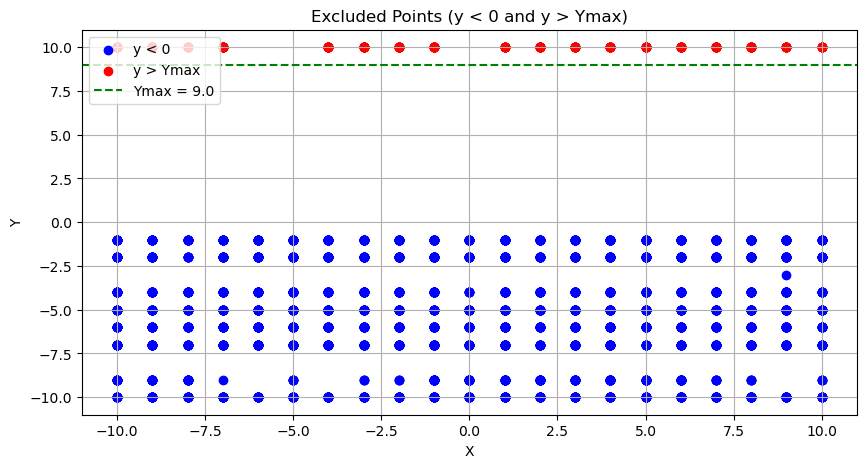

In [7]:
# Visualize excluded points (y < 0 in blue, y > Ymax in red)
plt.figure(figsize=(10, 5))
plt.scatter(df[mask_y_lt_0]['x'], df[mask_y_lt_0]['y'], color='blue', label='y < 0')
plt.scatter(df[mask_y_gt_Ymax]['x'], df[mask_y_gt_Ymax]['y'], color='red', label='y > Ymax')
plt.axhline(Ymax, color='green', linestyle='--', label=f'Ymax = {Ymax}')
plt.title("Excluded Points (y < 0 and y > Ymax)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


#### viii. Plotting the remaining points:

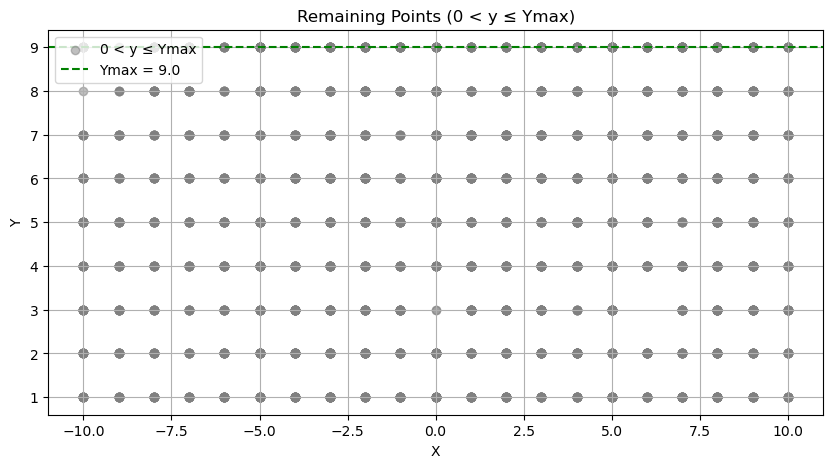

In [8]:
# Visualize remaining points (0 < y ≤ Ymax)
plt.figure(figsize=(10, 5))
plt.scatter(remaining_clean['x'], remaining_clean['y'], color='gray', alpha=0.5, label='0 < y ≤ Ymax')
plt.axhline(Ymax, color='green', linestyle='--', label=f'Ymax = {Ymax}')
plt.title("Remaining Points (0 < y ≤ Ymax)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()
